## Basic Setup For SVM Ranking With Backward Search for Feature Selection

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Replacing 0 values from Glucose BloodPressure and SkinThickness since they are impossible outliers and we will replace them with null
#I am not sure if they paper implemented this (wasn't mentioned although can be implied) but it 
# is standard for using SVM and credit to Rishi Damarla for explaining the neccessity for removing zeroes within this dataset
# in particular on kaggle discussions

removingZeroes = ["Glucose","BloodPressure","SkinThickness"]

for column in removingZeroes:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

## Features All {a1...a8}

In [7]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [8]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.763021")

Accuracy with SVM: 0.7760416666666666
Note: Accuracy from paper was 0.763021


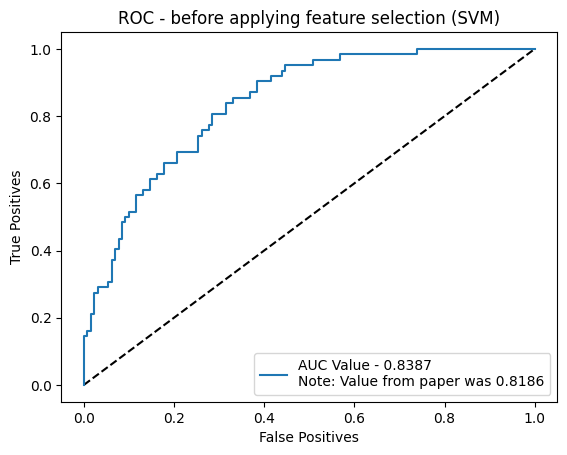

In [10]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

modelSVM=svm.SVC(probability=True)
modelSVM.fit(x_train,y_train)
y_predForSVM = modelSVM.predict_proba(x_test)[:,1]
fpr, tpr, threshhold = roc_curve(y_test, y_predForSVM)
aucCalc = auc(fpr, tpr)


# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC Value - %0.4f' % aucCalc + ' \nNote: Value from paper was 0.8186')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC - before applying feature selection (SVM)')
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.763021")

Accuracy with Naive Bayes: 0.7604166666666666
Note: Accuracy from paper was 0.763021


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[113  17]
 [ 29  33]]


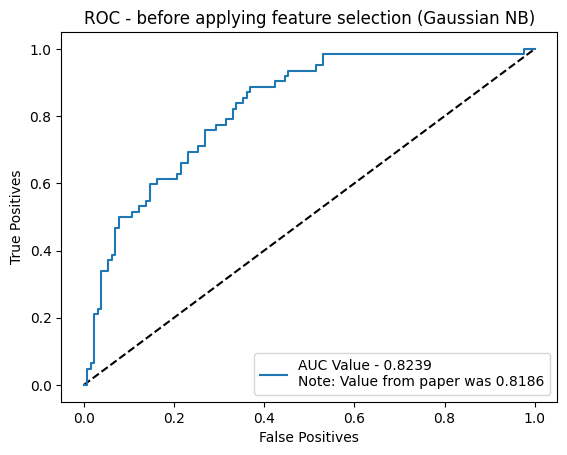

In [13]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

modelSVM=GaussianNB().fit(x_train,y_train)
y_predForSVM = modelSVM.predict_proba(x_test)[:,1]
fpr, tpr, threshhold = roc_curve(y_test, y_predForSVM)
aucCalc = auc(fpr, tpr)


# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC Value - %0.4f' % aucCalc + ' \nNote: Value from paper was 0.8186')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC - before applying feature selection (Gaussian NB)')
plt.legend(loc='best')
plt.show()

ROC is a probability curve and AUC (Area Under Curve) represents the degree or measure of separability. We will find out how much the model is capable of distinguishing between classes and just a note/reminder: 0.5 signifies randomness and 1 is a perfect classification

## A4 Removed

In [51]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [52]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.768229")

Accuracy with SVM: 0.7760416666666666
Note: Accuracy from paper was 0.768229


In [54]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.768229")

Accuracy with Naive Bayes: 0.7708333333333334
Note: Accuracy from paper was 0.768229


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[114  16]
 [ 28  34]]


## A5 Removed

In [56]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [57]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.768229")

Accuracy with SVM: 0.7604166666666666
Note: Accuracy from paper was 0.768229


In [59]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.768229")

Accuracy with Naive Bayes: 0.7552083333333334
Note: Accuracy from paper was 0.768229


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[109  21]
 [ 26  36]]


## A8 Removed

In [61]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [62]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.777344")

Accuracy with SVM: 0.765625
Note: Accuracy from paper was 0.777344


In [64]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.777344")

Accuracy with Naive Bayes: 0.7708333333333334
Note: Accuracy from paper was 0.777344


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[111  19]
 [ 25  37]]


## A3 Removed

In [14]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [15]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.772135")

Accuracy with SVM: 0.7708333333333334
Note: Accuracy from paper was 0.772135


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[118  12]
 [ 32  30]]


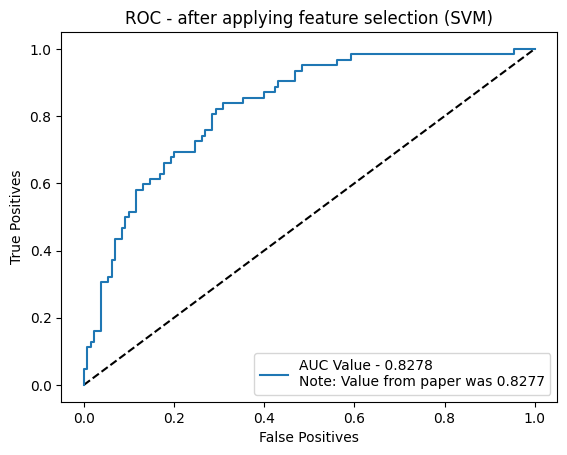

In [18]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

modelSVM=svm.SVC(probability=True)
modelSVM.fit(x_train,y_train)
y_predForSVM = modelSVM.predict_proba(x_test)[:,1]
fpr, tpr, threshhold = roc_curve(y_test, y_predForSVM)
aucCalc = auc(fpr, tpr)


# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC Value - %0.4f' % aucCalc + ' \nNote: Value from paper was 0.8277')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC - after applying feature selection (SVM)')
plt.legend(loc='best')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.772135")

Accuracy with Naive Bayes: 0.78125
Note: Accuracy from paper was 0.772135


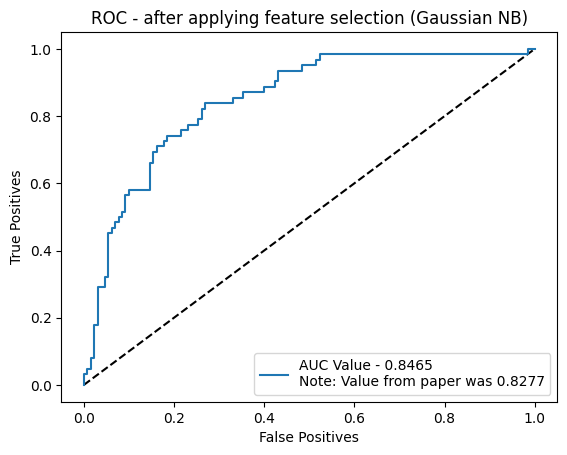

In [20]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

modelSVM=GaussianNB().fit(x_train,y_train)
y_predForSVM = modelSVM.predict_proba(x_test)[:,1]
fpr, tpr, threshhold = roc_curve(y_test, y_predForSVM)
aucCalc = auc(fpr, tpr)


# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC Value - %0.4f' % aucCalc + ' \nNote: Value from paper was 0.8277')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC - after applying feature selection (Gaussian NB)')
plt.legend(loc='best')
plt.show()

## A7 Removed

In [73]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BMI']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [74]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.756510")

Accuracy with SVM: 0.7708333333333334
Note: Accuracy from paper was 0.756510


In [76]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Pregnancies', 'Glucose', 'BMI']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.756510")

Accuracy with Naive Bayes: 0.7604166666666666
Note: Accuracy from paper was 0.756510


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[114  16]
 [ 30  32]]


## A1 Removed

In [78]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Glucose', 'BMI']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [79]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
print("Accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Note: Accuracy from paper was 0.764323")

Accuracy with SVM: 0.765625
Note: Accuracy from paper was 0.764323


In [81]:
from sklearn.model_selection import train_test_split
x = df.loc[:, ['Glucose', 'BMI']]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)
nb = GaussianNB().fit(x_train,y_train)
nb.predict(x_test)[:10]
y_pred = nb.predict(x_test)
print("Accuracy with Naive Bayes:", accuracy_score(y_test,y_pred))
print("Note: Accuracy from paper was 0.764323")

Accuracy with Naive Bayes: 0.7708333333333334
Note: Accuracy from paper was 0.764323


In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[115  15]
 [ 29  33]]


## Improving the Results

In [21]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.75, test_size = 0.25)

In [22]:
from sklearn import svm
clf = svm.SVC(kernel="linear", probability=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Our Best Accuracy:", accuracy_score(y_test, y_pred))
print("Note: Best Accuracy from paper was 0.777344")

Our Best Accuracy: 0.8020833333333334
Note: Best Accuracy from paper was 0.777344


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[118  12]
 [ 26  36]]


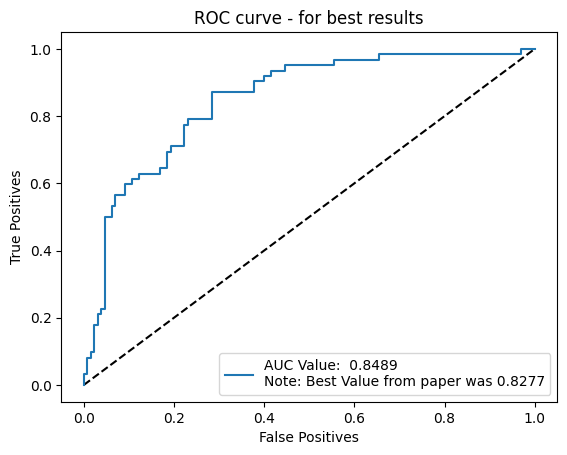

In [25]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

modelSVM = svm.SVC(kernel='linear',probability=True)
modelSVM.fit(x_train,y_train)
y_predForSVM = modelSVM.predict_proba(x_test)[:,1]
fpr, tpr, threshhold = roc_curve(y_test, y_predForSVM)
aucCalc = auc(fpr, tpr)

# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC Value:  %0.4f' % aucCalc + ' \nNote: Best Value from paper was 0.8277')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC curve - for best results')
plt.legend(loc='best')
plt.show()

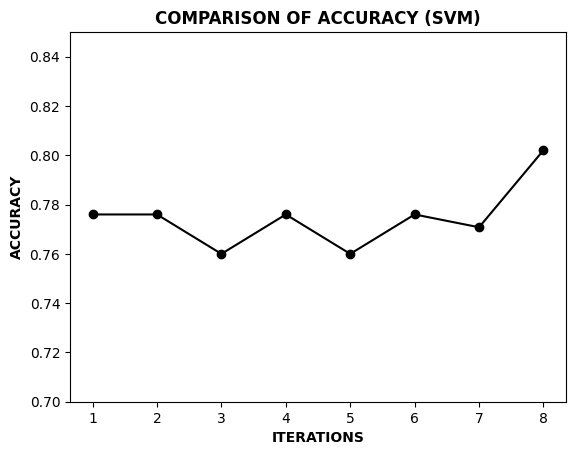

In [2]:
import matplotlib.pyplot as plt
   
iterations = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = [0.776, 0.776, 0.760, 0.776, 0.760, 0.776, 0.7708, 0.80208]
  
plt.plot(iterations, accuracy, color='black', marker='o')
plt.ylim(bottom=0.70, top= 0.85)
plt.title('COMPARISON OF ACCURACY (SVM)', weight='bold')
plt.xlabel('ITERATIONS', weight='bold')
plt.ylabel('ACCURACY', weight='bold')
plt.show()

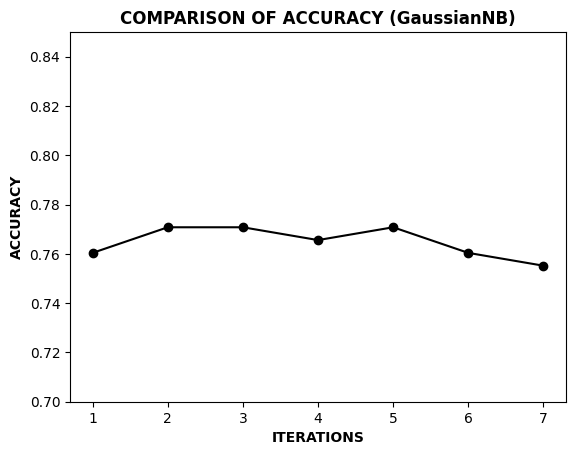

In [89]:
import matplotlib.pyplot as plt
   
iterations = [1, 2, 3, 4, 5, 6, 7]
accuracy = [0.7604, 0.7708, 0.7708, 0.7656, 0.7708, 0.7604, 0.7552]
  
plt.plot(iterations, accuracy, color='black', marker='o')
plt.ylim(bottom=0.70, top= 0.85)
plt.title('COMPARISON OF ACCURACY (GaussianNB)', weight='bold')
plt.xlabel('ITERATIONS', weight='bold')
plt.ylabel('ACCURACY', weight='bold')
plt.show()